# Dynamic financial analysis

In [484]:
import matplotlib.pyplot as plt
import numpy as np
import copy

# Initialization

In [485]:
N = 13
x_0 = 1667017 # insurance premium at the initial time (2022)
u_0 = 576078 # initial (2022) capital of the company

years = np.arange(2014,2023,1)
annual_payout_levels = np.array([20.33, 29.12, 20.1, 20.42, 25.74, 30.68, 36.29, 41.93, 43.17])		

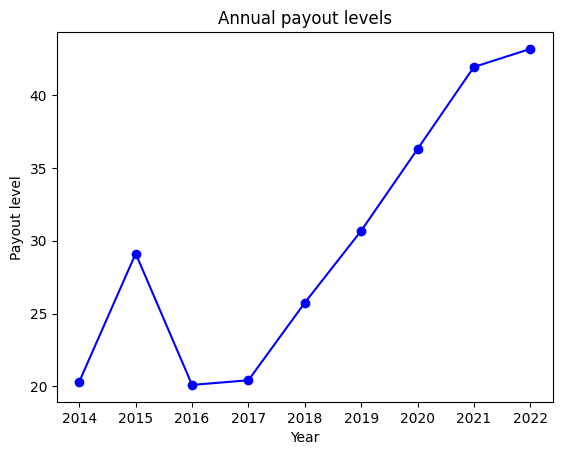

In [486]:
plt.title("Annual payout levels")
plt.ylabel("Payout level")
plt.xlabel("Year")
plt.plot(years, annual_payout_levels, color="blue")
plt.plot(years, annual_payout_levels, "o", color="blue")
plt.show()

# Monte Carlo generation

In [487]:
def x(t):
    # insurance premium
    return x_0 + t/N

In [488]:
def evolution_function(u_previous, v, t):
    return u_previous + (1-v)*x(t) - x(t)*np.random.choice(annual_payout_levels)/100

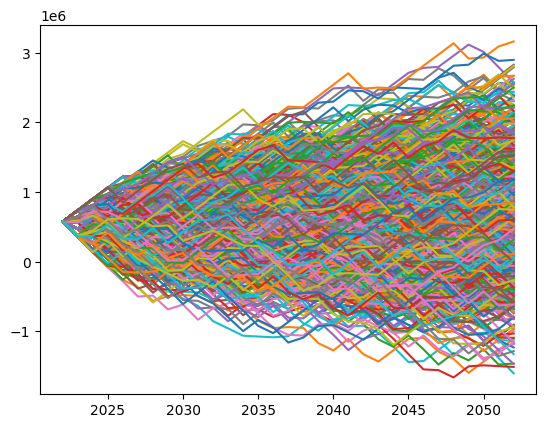

In [489]:
v = 0.7 # share of premiums spent on servicing insurance contracts
T = 31 # years of predictions
L = u_0/N

u_list = []
iterations = 1000

for i in range(iterations):
    u = np.zeros(T)
    for t in range(T):
        if t == 0:
            u[t] = u_0
        else:
            u[t] = evolution_function(u[t-1], v, t-1)
        
    plt.plot(np.arange(2022,2022+T,1), u)
    u_list.append(copy.deepcopy(u))

plt.show()

In [490]:
print("x ", end="")
for i in range(iterations):
    if i == iterations-1:
        print(i+1, end="\n")
    else:
        print(i+1, end=" ")

for t in range(T):
    print(2022 + t, end=" ")
    for i in range(iterations):
        if i == iterations-1:
            print(u_list[i][t], end="\n")
        else:
            print(u_list[i][t], end=" ")

x 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [491]:
u_mean = np.zeros(T)
prob = np.zeros(T)

for t in range(T):    
    u_mean[t] = np.mean([u_list[i][t] for i in range(iterations)])
    prob[t] = [len(np.where(u_list[i][:t] <= L)[0]) > 0 for i in range(iterations)].count(True)/iterations

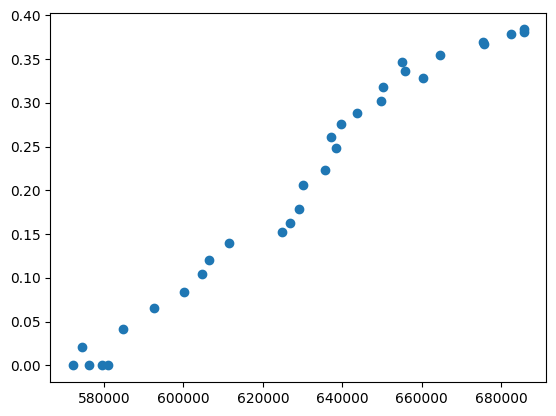

In [492]:
plt.plot(u_mean, prob, "o")
plt.show()

In [493]:
print("u p")
for t in range(T):
    print(u_mean[t], prob[t])

u p
576078.0 0.0
572171.0122571001 0.0
579574.7352008387 0.0
580997.0342365003 0.0
574359.3050270233 0.021
584668.9735664466 0.042
592461.1129273542 0.066
600007.7009757389 0.084
604750.5325744158 0.104
606440.8884364158 0.121
611575.9697358005 0.14
624742.5761825161 0.152
626726.6608230083 0.163
628990.8045661313 0.179
630093.7036749315 0.206
635600.8645938546 0.223
638414.9579393625 0.249
637076.3423000549 0.261
639596.2071739627 0.276
643783.924057955 0.288
649751.016641032 0.302
650322.3038941629 0.318
660276.0720466244 0.328
655694.4378726861 0.336
655116.3157635169 0.347
664582.1488776322 0.355
675591.1418456325 0.367
675415.4380430324 0.37
682526.1079156479 0.379
685708.9475860865 0.381
685772.9611245482 0.384


In [494]:
print(f"$\\alpha={v} : P(U_t < L) = {[len(np.where(u_list[i] <= L)[0]) > 0 for i in range(iterations)].count(True)/iterations}$")

$\alpha=0.7 : P(U_t < L) = 0.39$
